# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.metrics import classification_report,confusion_matrix

from sklearn.metrics import accuracy_score

import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# **Mount Drive**

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Read Dataset**

In [3]:
stellar = pd.read_csv("/content/drive/MyDrive/modified_star_classification.csv")

In [4]:
stellar.head()

,Unnamed: 0,Unnamed: 0.1,alpha,delta,u,g,r,i,z,class,redshift,plate,MJD
0,0,0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0,0.634794,5812,56354
1,1,1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0,0.779136,10445,58158
2,2,2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0,0.644195,4576,55592
3,3,3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0,0.932346,9149,58039
4,4,4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0,0.116123,6121,56187


In [6]:
stellar.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [7]:
stellar.shape

(90635, 11)

# **Train_Test_Split**

In [8]:
x = stellar.drop(['class'], axis=1)
y = stellar['class']

In [9]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

In [10]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(72508, 10) (72508,)
(18127, 10) (18127,)


In [11]:
# Normalizing approach
scaler = StandardScaler()
scaler.fit(x_train)

x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

# **ML**

### **1. KNN**


In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_predictions = knn.predict(x_test)

In [45]:
print(accuracy_score(y_test, knn_predictions))

0.9502399735201633


In [46]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     11878
           1       0.94      0.95      0.95      4251
           2       0.92      0.85      0.88      1998

    accuracy                           0.95     18127
   macro avg       0.94      0.92      0.93     18127
weighted avg       0.95      0.95      0.95     18127



In [47]:
print(confusion_matrix(y_test, knn_predictions))

[[11476   257   145]
 [  196  4055     0]
 [  286    18  1694]]


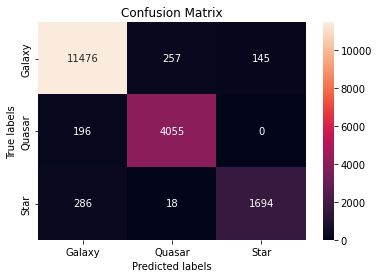

In [48]:
#Creating a confusion matrix to visualize classification results.
cm = confusion_matrix(y_test,knn_predictions)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Galaxy', 'Quasar','Star']); ax.yaxis.set_ticklabels(['Galaxy', 'Quasar','Star']);

### **2. Decsion Tree**

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_predictions = dtc.predict(x_test)

In [33]:
print(accuracy_score(y_test, dtc_predictions))

0.9618249020797706


In [34]:
print(classification_report(y_test, dtc_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11878
           1       1.00      1.00      1.00      4251
           2       0.83      0.85      0.84      1998

    accuracy                           0.96     18127
   macro avg       0.93      0.94      0.93     18127
weighted avg       0.96      0.96      0.96     18127



In [35]:
print(confusion_matrix(y_test, dtc_predictions))

[[11510    19   349]
 [   20  4231     0]
 [  303     1  1694]]


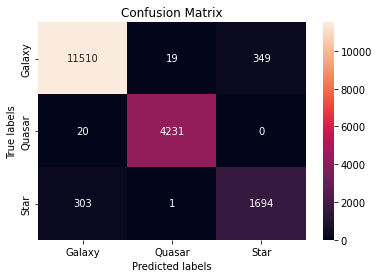

In [36]:
#Creating a confusion matrix to visualize classification results.
cm = confusion_matrix(y_test,dtc_predictions)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Galaxy', 'Quasar','Star']); ax.yaxis.set_ticklabels(['Galaxy', 'Quasar','Star']);

# **GridSearch**

### **KNN**

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
models = []

In [42]:
def select_best_model_with_grid_search(grid, estimator, x_train, y_train):
    grid_search = GridSearchCV(estimator=estimator, param_grid=grid, scoring='accuracy', verbose=5)
    grid_result = grid_search.fit(x_train, y_train)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    return grid_result.best_estimator_

In [43]:
model = KNeighborsClassifier().fit(x_train, y_train)
print("Validation score:", model.score(x_test, y_test))
models.append(select_best_model_with_grid_search({"n_neighbors": list(range(5,50, 5))}, KNeighborsClassifier(), x_train, y_train))


Validation score: 0.9502399735201633
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....................n_neighbors=5;, score=0.948 total time=   1.5s
[CV 2/5] END .....................n_neighbors=5;, score=0.949 total time=   1.6s
[CV 3/5] END .....................n_neighbors=5;, score=0.950 total time=   2.7s
[CV 4/5] END .....................n_neighbors=5;, score=0.950 total time=   5.0s
[CV 5/5] END .....................n_neighbors=5;, score=0.948 total time=   1.4s
[CV 1/5] END ....................n_neighbors=10;, score=0.942 total time=   1.6s
[CV 2/5] END ....................n_neighbors=10;, score=0.945 total time=   1.5s
[CV 3/5] END ....................n_neighbors=10;, score=0.946 total time=   1.6s
[CV 4/5] END ....................n_neighbors=10;, score=0.947 total time=   1.5s
[CV 5/5] END ....................n_neighbors=10;, score=0.946 total time=   1.5s
[CV 1/5] END ....................n_neighbors=15;, score=0.943 total time=   1.7s
[CV 2/5] END

### **2. Decsion Tree _ GridSearchCV**

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [50]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features='auto', random_state=1024)

In [52]:
#Training the model
dtc2 = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8, 
                              max_features='auto', random_state=1024)
dtc2.fit(x_train, y_train)
dtc2_predictions = dtc2.predict(x_test)

In [53]:
print(accuracy_score(y_test, dtc2_predictions))

0.9648038837093837
